# **Imports**

In [1]:
#basics
import pandas as pd
import numpy as np

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import model_selection

#GMM clustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import mixture

# neural network
from sklearn import neural_network

# evaluation
from scipy import stats
from sklearn import metrics

# visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Principal Component Decomposition**


     principal component 1  ...  principal component 5
0                 4.143335  ...              -1.170453
1                49.923272  ...              19.607943
2               -40.487903  ...               3.350777
3                49.702673  ...              19.191944
4               -18.955910  ...              13.064756
..                     ...  ...                    ...
506             -26.872042  ...               4.446755
507              38.392018  ...             -14.777584
508              -0.572606  ...             -12.130223
509             -16.971819  ...              12.898654
510              52.143352  ...              20.057350

[511 rows x 5 columns]
[0.33251723 0.64693095 0.83637362 0.90986687 0.95671024]


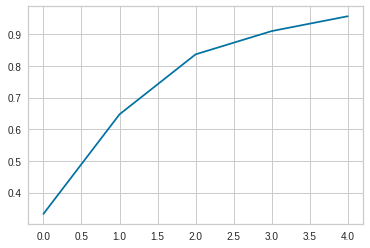

In [2]:
x = pd.read_csv('dataset_10.csv')

pca = PCA(n_components=5) # I could say pca = PCA(n_components = 0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
print(principalDf)
cumsum5 = np.cumsum(pca.explained_variance_ratio_)
print(cumsum5)
plt.plot(cumsum5)

# **Reducing Dimensionality for Data Visualisation**

     principal component 1  principal component 2  principal component 3
0                 4.143335              29.612798              36.701112
1                49.923272              -2.732370              -3.023602
2               -40.487903              44.462657             -10.621639
3                49.702673              -3.564282              -2.138836
4               -18.955910             -14.698657              14.889059
..                     ...                    ...                    ...
506             -26.872042             -31.733800             -22.773209
507              38.392018              27.895383             -27.652231
508              -0.572606             -20.116189              30.140483
509             -16.971819             -13.052571              11.681528
510              52.143352              -2.711031              -3.894817

[511 rows x 3 columns]


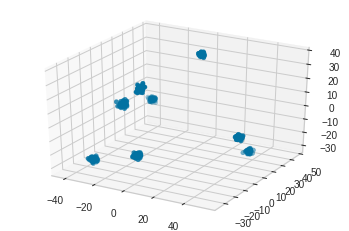

In [3]:
pca_visu = PCA(n_components=0.80)
PC_visu = pca_visu.fit_transform(x)
principal_visu = pd.DataFrame(data = PC_visu, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
cumsum3 = np.cumsum(pca_visu.explained_variance_ratio_)
#plt.plot(cumsum3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(principal_visu)
#Axes3D.scatter(principal_visu)
ax.scatter(principal_visu.iloc[:,0], principal_visu.iloc[:,1], principal_visu.iloc[:,2])

# **Silhouette score**

In [4]:
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = principalDf

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
print(S)

[0.3855817725706809, 0.42339372971463907, 0.5829811246125939, 0.7060556568552233, 0.7823146767905683, 0.8503198163546098, 0.934190007812281, 0.8534471543847386, 0.740900054609577]


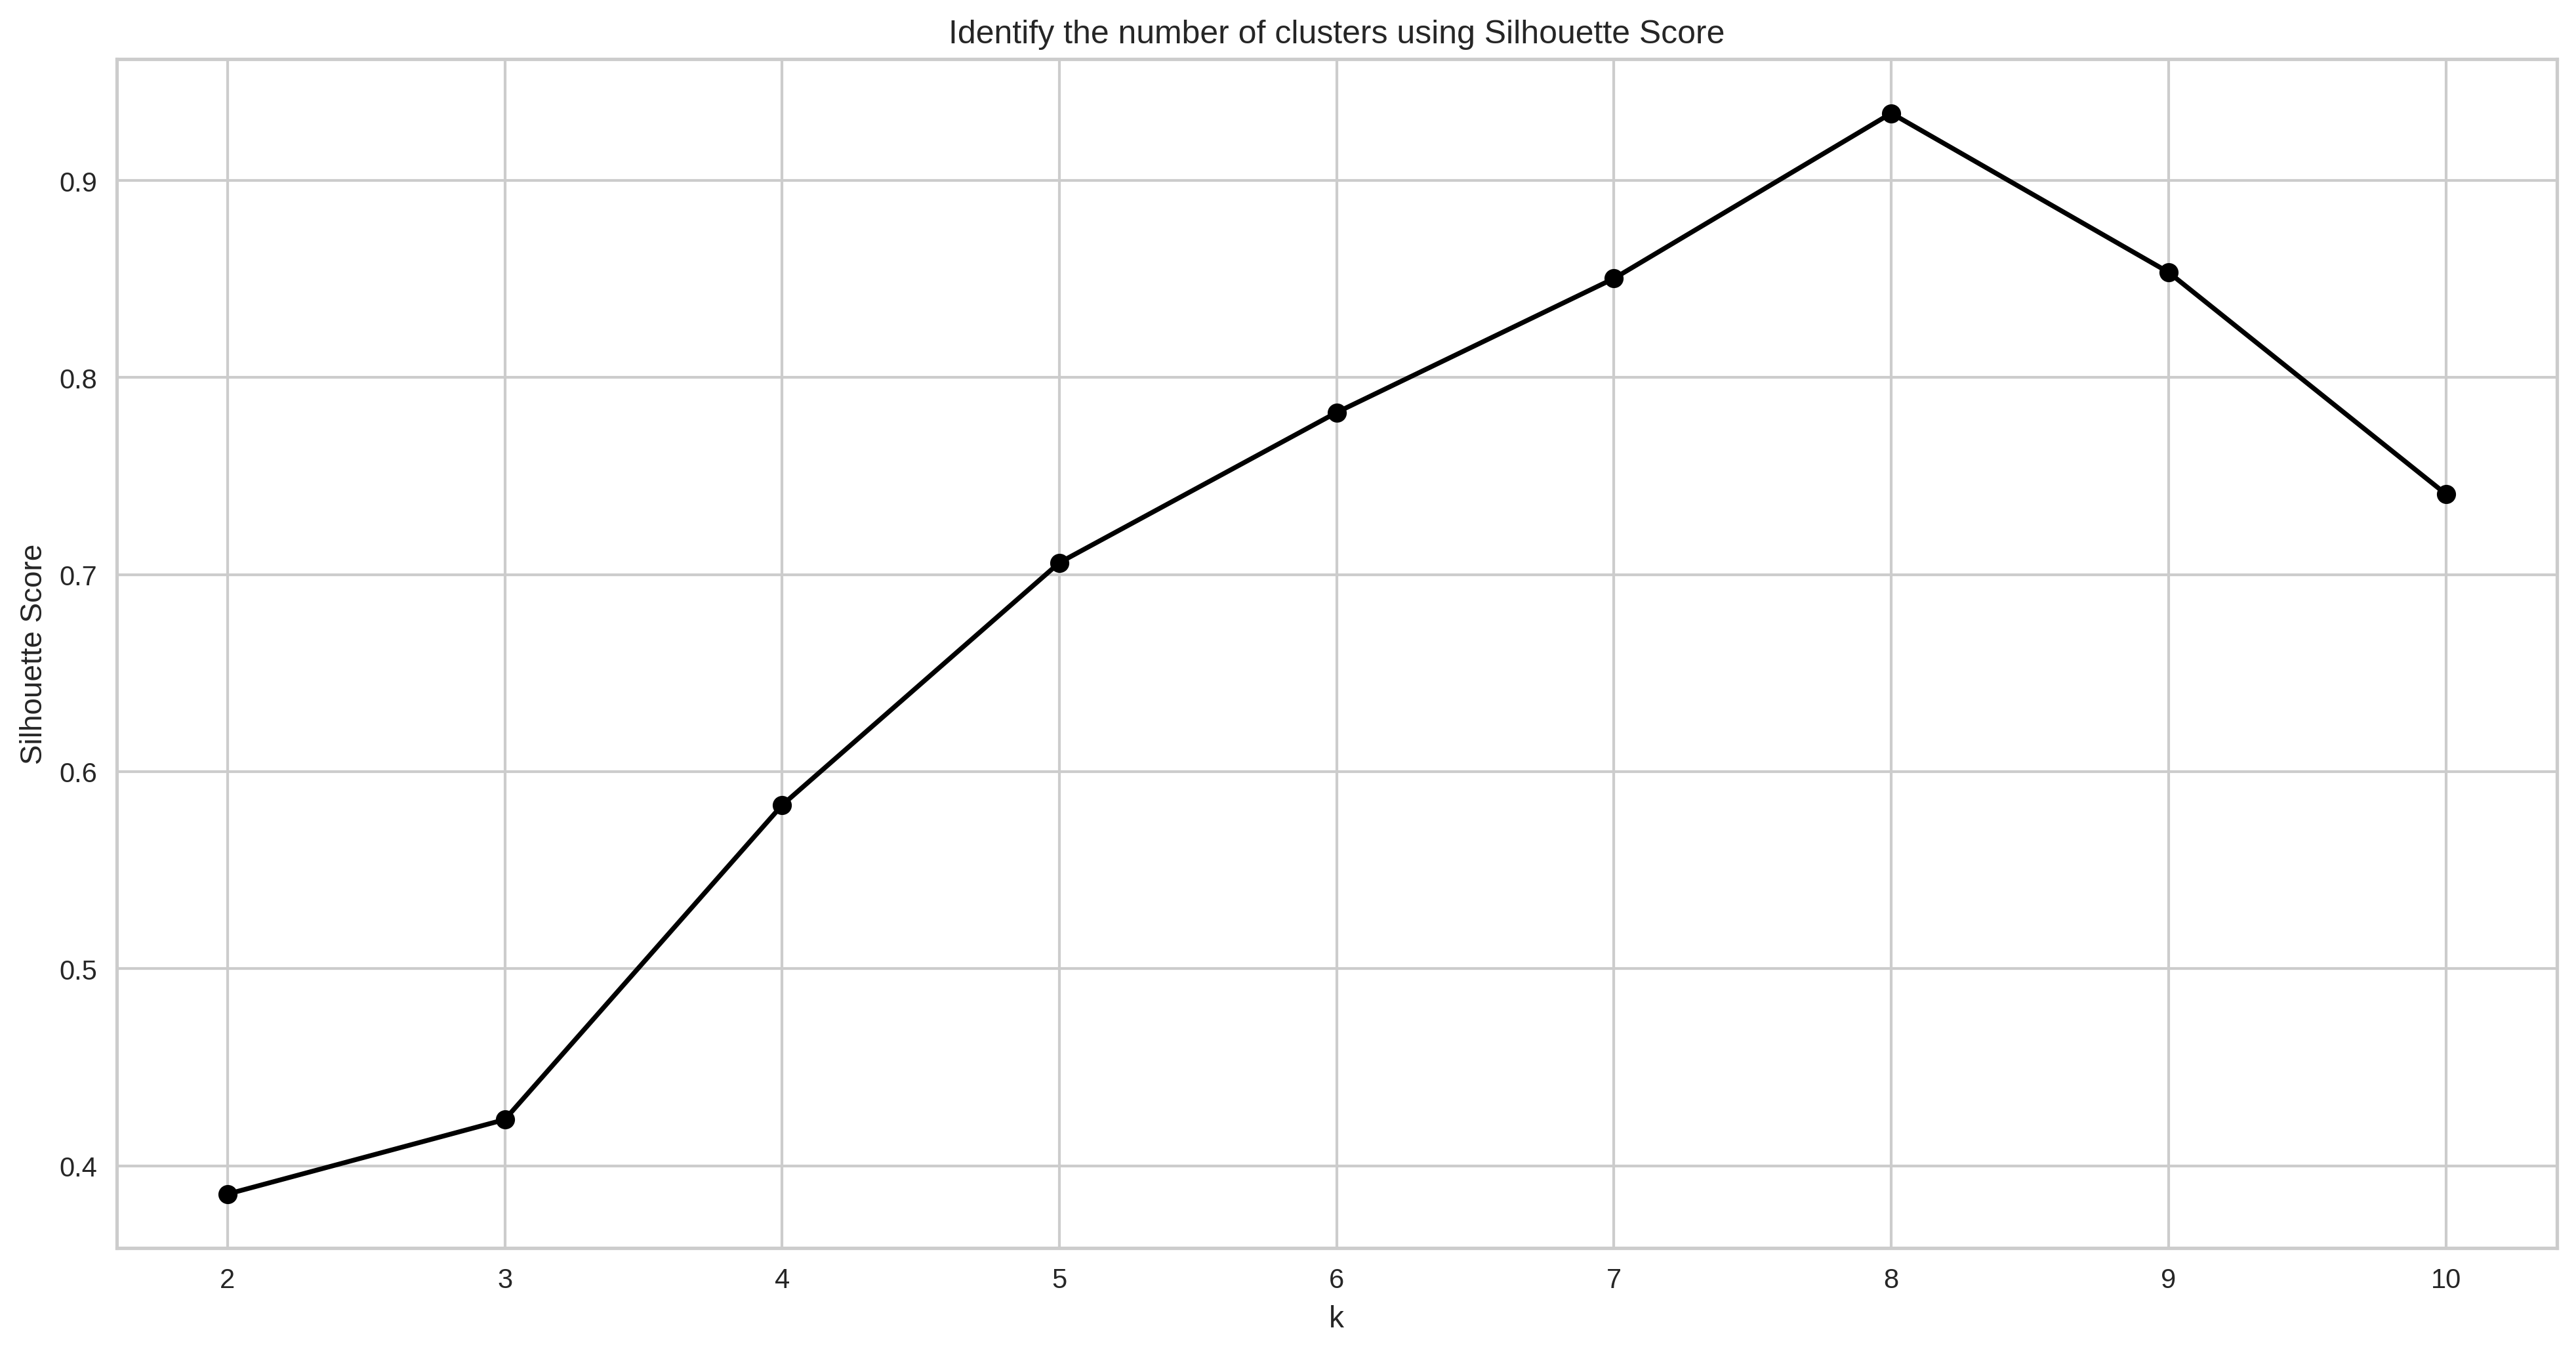

In [5]:
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

# **Elbow Score**

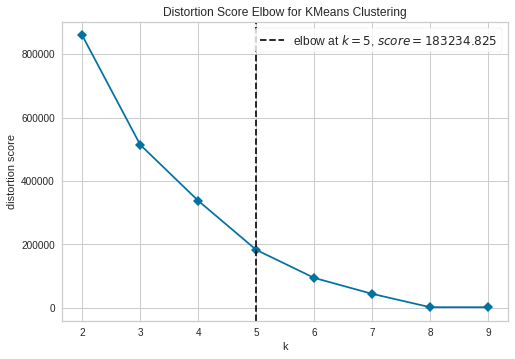

In [ ]:
# library
km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,10), nstart = 4, metric = 'distortion', timings=False)  # replace the image with this
visualizer.fit(principalDf)
visualizer.show()

In [ ]:
# more from scratch
wcss = [] 
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)  # init is a way of initialising the centroids
    kmeans.fit(principalDf) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# **GMM initialisation**

In [7]:
 # for calculating Silhouette score
# libraries
np.random.seed(1)
df = pd.read_csv('dataset_10.csv',header=None)
g = mixture.GaussianMixture(n_components = 8)
train, test = train_test_split(principalDf)
train = np.array(train.values)
test = np.array(test.values)

# **GMM from scratch-ish**

In [ ]:
'''
Created with love by Sigmoid
@Author - Păpăluță Vasile - vpapaluta06@gmail.com
'''

# Importing the libraries
import numpy as np
import pandas as pd
class GMM:
    '''
        This class is the implementation of the Gaussian Mixture Models 
        inspired by sci-kit learn implementation.
    '''
    def __init__(self, n_components, max_iter = 100, comp_names=None):
        '''
            This functions initializes the model by seting the following paramenters:
                :param n_components: int
                    The number of clusters in which the algorithm must split
                    the data set
                :param max_iter: int, default = 100
                    The number of iteration that the algorithm will go throw to find the clusters
                :param comp_names: list of strings, default=None
                    In case it is setted as a list of string it will use to
                    name the clusters
        '''
        self.n_componets = n_components
        self.max_iter = max_iter
        if comp_names == None:
            self.comp_names = [f"comp{index}" for index in range(self.n_componets)]
        else:
            self.comp_names = comp_names
        # pi list contains the fraction of the dataset for every cluster
        self.pi = [1/self.n_componets for comp in range(self.n_componets)]

    def multivariate_normal(self, X, mean_vector, covariance_matrix):
        '''
            This function implements the multivariat normal derivation formula,
            the normal distribution for vectors it requires the following parameters
                :param X: 1-d numpy array
                    The row-vector for which we want to calculate the distribution
                :param mean_vector: 1-d numpy array
                    The row-vector that contains the means for each column
                :param covariance_matrix: 2-d numpy array (matrix)
                    The 2-d matrix that contain the covariances for the features
        '''
        return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

    def fit(self, X):
        '''
            The function for training the model
                :param X: 2-d numpy array
                    The data must be passed to the algorithm as 2-d array, 
                    where columns are the features and the rows are the samples
        '''
        # Spliting the data in n_componets sub-sets
        new_X = np.array_split(X, self.n_componets)
        # Initial computation of the mean-vector and covarience matrix
        self.mean_vector = [np.mean(x, axis=0) for x in new_X]
        self.covariance_matrixes = [np.cov(x.T) for x in new_X]
        # Deleting the new_X matrix because we will not need it anymore
        del new_X
        for iteration in range(self.max_iter):
            ''' --------------------------   E - STEP   -------------------------- '''
            # Initiating the r matrix, evrey row contains the probabilities
            # for every cluster for this row
            self.r = np.zeros((len(X), self.n_componets))
            # Calculating the r matrix
            for n in range(len(X)):
                for k in range(self.n_componets):
                    self.r[n][k] = self.pi[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                    self.r[n][k] /= sum([self.pi[j]*self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.n_componets)])
            # Calculating the N
            N = np.sum(self.r, axis=0)
            ''' --------------------------   M - STEP   -------------------------- '''
            # Initializing the mean vector as a zero vector
            self.mean_vector = np.zeros((self.n_componets, len(X[0])))
            # Updating the mean vector
            for k in range(self.n_componets):
                for n in range(len(X)):
                    self.mean_vector[k] += self.r[n][k] * X[n]
            self.mean_vector = [1/N[k]*self.mean_vector[k] for k in range(self.n_componets)]
            # Initiating the list of the covariance matrixes
            self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.n_componets)]
            # Updating the covariance matrices
            for k in range(self.n_componets):
                self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0)
            self.covariance_matrixes = [1/N[k]*self.covariance_matrixes[k] for k in range(self.n_componets)]
            # Updating the pi list
            self.pi = [N[k]/len(X) for k in range(self.n_componets)]
    def predict(self, X):
        '''
            The predicting function
                :param X: 2-d array numpy array
                    The data on which we must predict the clusters
        '''
        probas = []
        for n in range(len(X)):
            probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                           for k in range(self.n_componets)])
        cluster = []
        for proba in probas:
            cluster.append(self.comp_names[proba.index(max(proba))])
        return cluster

In [ ]:
GMM_test = GMM(n_components=8)
GMM_test.fit(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [ ]:
train = train.reshape(1,-1)
labels = GMM_test.predict(test)
labels = np.array(labels)
labels = labels.reshape(-1,1)
metrics.silhouette_score(train, labels, metric='euclidean')

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

# **AIC and BIC**

True


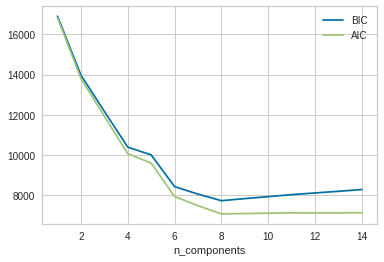

In [ ]:
n_components = np.arange(1, 15)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(train)
          for n in n_components]

plt.plot(n_components, [m.bic(train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
gmm = mixture.GaussianMixture(8, covariance_type='full', random_state=0)
gmm.fit(principalDf)
print(gmm.converged_)

# **GMM Fitting with 8 clusters**

In [8]:
model = mixture.GaussianMixture(n_components=8, n_init=20, init_params='kmeans')
labels = model.fit_predict(train,test)
metrics.silhouette_score(train, labels, metric='euclidean')

0.9342998918123974

# **Task 2 using sklearn**

0.0 1.0
0.0 1.0
(614, 2) (410, 2) (614,) (410,)
0.003669180230737479
0.003669180230737479


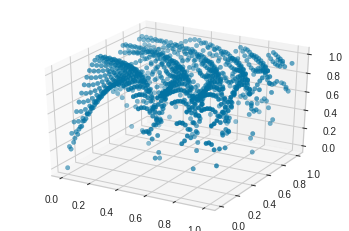

0.018608682697349537 7 3 identity <bound method BaseEstimator.get_params of MLPRegressor(activation='tanh', alpha=0.023, hidden_layer_sizes=100,
             max_iter=10000, solver='lbfgs', warm_start=True)>


In [9]:
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay


np.random.seed(1)

# preprocessing
task2 = pd.read_csv('train.csv',header=None)
task2 = pd.DataFrame(task2).to_numpy()
scaler = MinMaxScaler()
scaled_task2 = scaler.fit_transform(task2)
X = scaled_task2[:, :-1]
target = scaled_task2[:, -1]
print(np.min(X), np.max(X))
print(np.min(target), np.max(target))

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# neural network, single
model = neural_network.MLPRegressor(activation='tanh', warm_start = True, max_fun = 15000, random_state = None, solver = "lbfgs", max_iter=10000, alpha = 0.023, hidden_layer_sizes=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# neural network grid search
#param_list = {"hidden_layer_sizes": [1,10], "activation": ["tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0,1], "learning_rate": ["constant", "invscaling", "adaptive"]}
#gridCV = GridSearchCV(estimator=model, param_grid=param_list)
#gridCV.fit(X_train,y_train)
#cv_predict = gridCV.predict(X_test)

#evaluation
print(r2_score(y_test, y_pred)) 
print(model.score(X_test,y_test)) #model.score uses r2 score
#print(r2_score(y_test, cv_predict), gridCV.best_estimator_)

#loss_values = model.loss_curve_ # only if solver is sgd
# visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],target)
plt.show()

#plt.plot(model.loss_curve_)
#plt.title("Loss Curve", fontsize=14)
#plt.xlabel('Iterations')
#plt.ylabel('Cost')
#plt.show()

print(model.loss_, model.n_iter_, model.n_layers_, model.out_activation_, model.get_params)

In [ ]:
# use neural_network.partial_fit
# A REMINDER HERE TO ALSO USE DIFFERENT SCORING METRICS THAN R2!!!!!!!!
# standardisation versus normalisation?

# **Illia's code**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7715066604037247
0.09223339955490915 10000 3 identity <bound method BaseEstimator.get_params of MLPRegressor(activation='tanh', alpha=0.023, hidden_layer_sizes=100,
             max_iter=10000, solver='lbfgs', warm_start=True)>


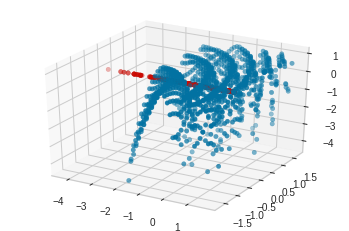

In [10]:
# imports
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neural_network

# seed
np.random.seed(1)

# preprocessing
task2 = pd.read_csv('train.csv',header=None)
task2 = pd.DataFrame(task2).to_numpy()
X = task2[:, :-1]
target = task2[:, -1]
X = preprocessing.scale(X)
target = preprocessing.scale(target)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, target)

# neural network
model = neural_network.MLPRegressor(activation='tanh', 
                                    solver = 'lbfgs', 
                                    alpha = 0.023, 
                                    batch_size = 'auto',
                                    learning_rate = 'constant', 
                                    random_state = None,
                                    max_iter = 10000,
                                    warm_start = True,
                                    max_fun = 15000,
                                    hidden_layer_sizes=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))
print(model.loss_, model.n_iter_, model.n_layers_, model.out_activation_, model.get_params)

# visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target,ys=0, c='r')
ax.scatter(X[:,0], X[:,1],target)
plt.show()

# **PyTorch**

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)    # reproducible

x = torch.from_numpy(X).float()
y = torch.from_numpy(target).float()               

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.hardtanh(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=2, n_hidden=4, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.Adam(net.parameters(), lr=0.8)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss


# train the network
for t in range(2000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

print(loss)

Net(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (predict): Linear(in_features=4, out_features=1, bias=True)
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0699, grad_fn=<MseLossBackward0>)


# **ANN from scratch-ish**

In [ ]:
# https://adventuresinmachinelearning.com/neural-networks-tutorial/
nn_structure = [1024, 500, 1]


def f(x):
    return 1 / (1 + np.exp(-x))
def f_deriv(x):
    return f(x) * (1 - f(x))

from sklearn.model_selection import train_test_split
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

import numpy as np
#def convert_y_to_vect(y):
 #   y_vect = np.zeros((len(y), 10))
  #  for i in range(len(y)):
   #     y_vect[i, y[i]] = 1
   # return y_vect
#y_v_train = convert_y_to_vect(y_train)
#y_v_test = convert_y_to_vect(y_test)
#y_train[0], y_v_train[0]


import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {} #{}
    b = {} #{}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    print(len(W), len(b))
    return W, b

def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    print(type(W), type(x))
    for l in range(1, len(W) + 1):
        # if it is the first layer, then the input into the weights is x, otherwise, 
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)  
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l)) 
    return h, z

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)

def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values, to be used in the
            # gradient descent step
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) 
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

from sklearn.metrics import accuracy_score
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train)

y_pred = predict_y(W, b, X_test, 3)
accuracy_score(y_test, y_pred)*100


plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

2 2
Starting gradient descent for 3000 iterations
Iteration 0 of 3000
<class 'dict'> <class 'numpy.ndarray'>


ValueError: ignored